<div dir=rtl><h1>
&emsp;
&emsp;
&emsp;
&emsp;
&emsp;
<b>
פרוייקט חלק 1
</b>
</h1>

<h4>
שמות: אריאל נובומינסקי, אילי ששון
</br>
ת.ז. : 322228974, 322995358
</h4>


</div>

<div dir=rtl><h2>
<b>
תיאור הנתונים:
</b>
</h2>

<h4>
סט הנתונים הוא מכיל פרטים על אפליקציות בחנות האפלקציות של גוגל (Google Play) שנאספו בשנת 2018.
</h4>

</br>
<h3><b>
עמודות מסד הנתונים:
</b>
</h3>

<h4>
<u>App</u> - משתנה מסוג מחרוזת, משמעותו היא שם האפליקציה, מזהה יחודי לכל רשומה.
</br>
<u>Category</u> - משתנה מסוג מחרוזת, הקטגוריה אליה האפליקציה שייכת (משחקים, משפחה וכו').
</br>
<u>Rating</u> - משתנה נומרי בעל ערך בין 0 ל- 5, משמעותו היא ממוצא דירוגי המשתמשים עבור האפליקציה.
</br>
<u>Reviews</u> - משתנה נומרי, משמעותו היא מספר הביקורת שהאפליקציה קיבלה בסך הכל.
</br>
<u>Size</u> - משתנה מסוג מחרוזת, משמעותו היא גדול האפליקיציה במגה בייט, יכול לקבל את הערך "Varies with device".
</br>
<u>Installs</u> - משתנה מסוג מחרוזת, משמעותו היא מספר ההורדות הכולל של האפליקיצה.   המספר אינו מספר מדויק, אלא מספר עגול (בכפולות של 10) שהכי קרוב למספר האמיתי.
</br>
<u>Type</u> - משתנה מסוג מחרוזות, משמעותו היא אם האפליקציה בחינם, בתשלום או לא ידוע.
</br>
<u>Price</u> - משתנה מסוג מחרוזת, משמעותו היא מחיר האפליקציה, במידה והיא בחינם המחיר הוא 0.
</br>
<u>Content Rating</u> - משתנה מסוג מחרוזות, משמעותו היא קבוצת הגיל של קהל היעד של האפליקיציה (כולם, מבוגרים, נערים וכו').
</br>
<u>Genres</u> - משתנה מסוג מחרוזת, בשונה מקטגוריה, אפליקציה יכולה להשתייך למספר ג'אנרים. משמעות המשתנה היא הג'אנרים אליהם האפליקציה משתייכת. שמות הג'אנרים מופרדים בנקודה פסיק (;).
</br>
<u>Last Updated</u> - משתנה מסוג מחרוזת, משמעותו היא התאריך האחרון בו עדכנו את האפליקציה.
</br>
<u>Current Ver</u> - משתנה מסוג מחרוזת, משמעותו היא מספר הגירסה האחרונה של האפליקציה, יכול לקבל את הערך "Varies with device".
</br> 
<u>Android Ver</u> - משתנה מסוג מחרוזת, משמעותו היא הגירסה המינמלית של אנדרואיד על מנת להוריד את האפליקציה.

</h4>

<h4>
קישור לסט הנתונים: 
<a src=https://www.kaggle.com/lava18/google-play-store-apps> https://www.kaggle.com/lava18/google-play-store-apps <a>
</h4>



</div>

<div dir=rtl><h3>
<b>
טרנספורמציות לסט הנתונים
</b>
</h3>

<h4>
בצענו מספר טרנספורמציות לסט הנתונים:
</br>
1. הורדת כל הרשומות בהם יש נתונים חסרים (null valuse).
</br>
2. הפכנו את השדה "Type" לשדה הבינארי "IsFree" שהוא true אם האפליקציה היא בחינם ואחרת false.
</br>
3. הפיכת המשתנה "Last Updated" למשתנה מסוג datetime.
</br>
4. יצירת משתנה בינארי חדש "Recntly Updated" המציין אם האפליקציה עודכנה אחרי 1/6/2018.
</br>
5. הפיכת המשתנה "Install" למשתנה נומרי.

</br>
</br>
מספר הרשומות לפני הטרנספורמציות - 10841
</br>
מספר הרשומות אחרי הטרנספורמציות - 9360
</h4>


</br>
</br>
<h3>
<b>קטעי הקוד המבצעות את הטרנספורמציות:</b>
</h3>
</div>

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import math
import statsmodels.api as sm
import scipy.stats as dist

In [290]:
 df = pd.read_csv("/content/googleplaystore.csv")

In [291]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Drop rows with null values and rows where type is not equal to "paid" or "free"

In [292]:
print('Row number befor drop: ' , len(df))
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
print('Row number after drop: ' , len(df))

Row number befor drop:  10841
Row number after drop:  9360


Trasform the type field to binery field "IsFree"

In [293]:
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",True,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",True,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",True,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",True,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",True,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Create new binery field "Recntly Updated" 

In [294]:
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",True,0,Everyone,False,2018-01-07,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",True,0,Everyone,False,2018-01-15,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",True,0,Everyone,True,2018-08-01,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",True,0,Teen,True,2018-06-08,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",True,0,Everyone,True,2018-06-20,Art & Design;Creativity,1.1,4.4 and up


Transform "Installs" field to nomeric field

In [295]:
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,True,0,Everyone,False,2018-01-07,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,True,0,Everyone,False,2018-01-15,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,True,0,Everyone,True,2018-08-01,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,True,0,Teen,True,2018-06-08,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,True,0,Everyone,True,2018-06-20,Art & Design;Creativity,1.1,4.4 and up


In [296]:
df['Reviews'] = df['Reviews'].map(lambda s: int(s))
df.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,True,0,Everyone,False,2018-01-07,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,True,0,Everyone,False,2018-01-15,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,True,0,Everyone,True,2018-08-01,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,True,0,Teen,True,2018-06-08,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,True,0,Everyone,True,2018-06-20,Art & Design;Creativity,1.1,4.4 and up


**Statistical Anlisys**

**Rating:**

The mean of the rating is:  4.191837606837606
The median of the rating is:  4.3
Histogram: 


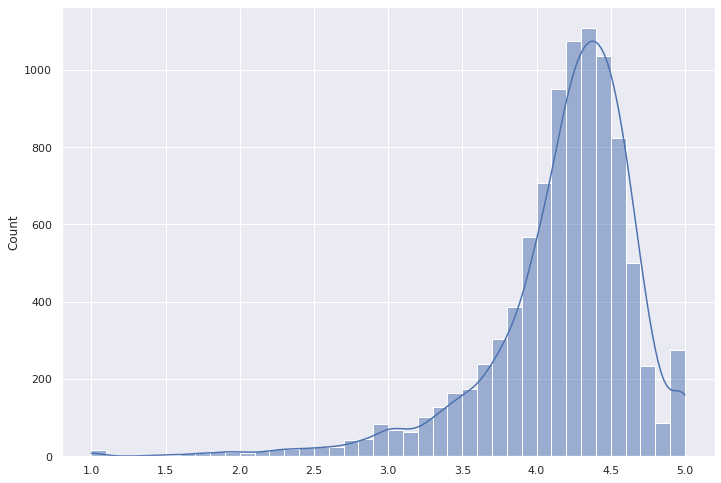

qq - plot:


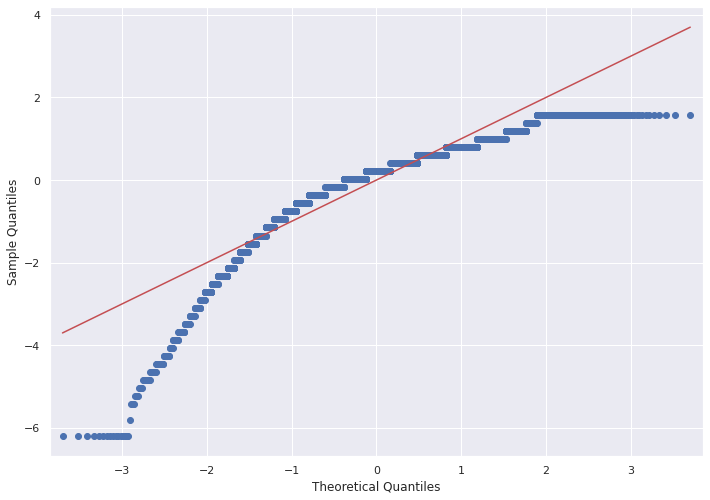

In [297]:
vals = df['Rating'].to_numpy()
print('The mean of the rating is: ', np.mean(vals))
print('The median of the rating is: ', np.median(vals))
print('Histogram: ')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(vals, binwidth=0.1, kde = True)
plt.show()

print('qq - plot:')
sm.qqplot(vals, fit = True, line = 's')
plt.show()


<div dir=rtl>

<h4>
לפי ההסטוגרמה וגרף ה - qq - plot של משתנה ה - Rating אפשר להסיק כי   ההתפלגות  היא התפלגות נורמלית עם זנב שמאלי כבד וזנב ימני צר, כלומר הערכי השברונים הקטנים בהתלפגות הנתונה קטינים משמעותית מערכיהם בהתפלגות הנורמלית וערכי השברונים הגדולים קטנים משמעותית מערכיהם בהתפלגות הנורמלית.
</br>
בנוסף, הממוצא הוא 4.2 והחציון הוא 4.3.
העובדה שהחציון קרוב לממוצע נובעת מכך שיש הרבה ערכים נמוכים (הזנב הכבד) אך במקביל רוב ההתפלגות מרוכזת בערכים הגבוהים (הזנב הצר) ולכן הערכים הנמוכים (שניתן לפרשם כערכים חריגים) אינם "מושכים" את ההממוצא כלפי מטה.
</h4>
</div>

**Reviews**:

In [298]:
def plot_with_bin(data_dict, bin):
  bin_counts = {}

  k = bin
  bin_counts[k] = 0
  for i in data_dict.keys():

    if i <= k: 
      bin_counts[k] += data_dict[i]
    else:
      k += bin
      bin_counts[k] = data_dict[i]
  plt.xlabel("Number Of Reviews")
  plt.ylabel("Appreanse Count")    
  plt.scatter(bin_counts.keys(), bin_counts.values())
  plt.show() 

In [299]:
def saparate(data_dict, sap, bin1, bin2):
  

  less_then = {}
  for k in counts.keys():
    if k <= sap:
      less_then[k] = counts[k]

  print('Range of counts for reviws smaller then ', sap, ': [', min(less_then.values()), ',', max(less_then.values()), ']')

  print('Histogram of all reviwes smaller then ', sap, ': ')
  plt.scatter(less_then.keys(), less_then.values())
  plt.show() 

  more_then = {}
  for k in counts.keys():
    if k > sap:
      more_then[k] = counts[k]

  print('Range of counts for reviws gratter then ', sap, ': [', min(more_then.values()), ',', max(more_then.values()), ']')

  print('Histogram of all reviwes gratter then ', sap, ': ')
  print(more_then)
  plt.scatter(more_then.keys(), more_then.values())
  plt.show() 


In [300]:
vals = df['Reviews'].to_numpy()
print('The mean of the reviews is: ', np.mean(vals))
print('The median of the reviews is: ', np.median(vals))

The mean of the reviews is:  514376.7052350427
The median of the reviews is:  5955.0


<div dir=rtl>

<h4>
ממומצא מספר הביקורות הוא
<b> 514376.7 </b>
 וחציון מספר הביקורות הוא
 <b> 5955</b>
 . הממוצא רחוק מאוד מהחציון ולכן ניתן להסיק שרוב האפליקציות מקבלות מספר נמוך של ביקרות בעוד שיש מעט אפליקציות עם מספר ביקורות גבוה מאוד.
</br>
</br> 
ניתן לראות עובדה זאת בהיסטוגרמה הבאה:
</h4>
</div>

---



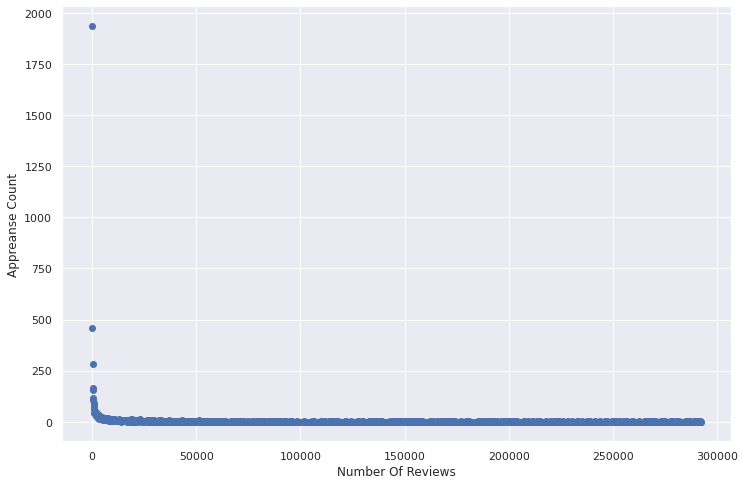

In [301]:
sns.set(rc={'figure.figsize':(12,8)})

counts = {}

for v in vals:
  if v in counts.keys():
    counts[v] += 1
  else:
    counts[v] = 1

counts = dict(sorted(counts.items()))
plot_with_bin(counts, 100)

<div dir=rtl><h4>
נציג היסטוגרמה של מופעי מספרי הביקורות עבור מספרי ביקורות הגדולים מ - 150 והיסטוגרמה דומה עבור מספרי ביקורות הקטנים מ - 150:

</h4>
</div>

Range of counts for reviws smaller then  150 : [ 1 , 83 ]
Histogram of all reviwes smaller then  150 : 


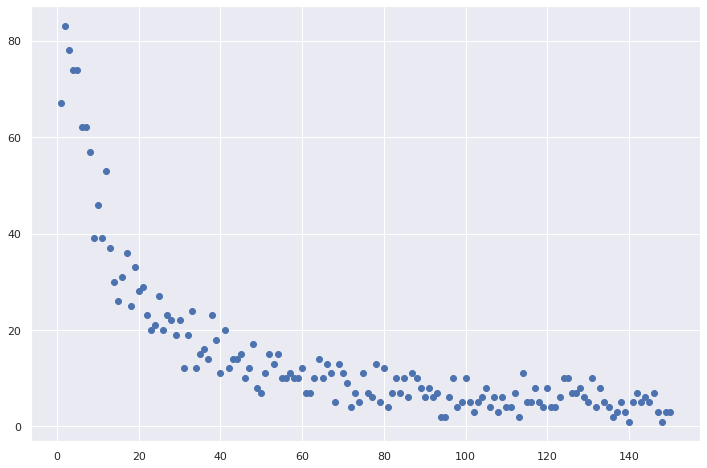

Range of counts for reviws gratter then  150 : [ 1 , 10 ]
Histogram of all reviwes gratter then  150 : 
{151: 1, 152: 3, 153: 2, 154: 4, 155: 5, 156: 4, 157: 1, 158: 4, 159: 9, 160: 7, 161: 1, 162: 5, 163: 5, 164: 6, 165: 1, 166: 5, 167: 3, 168: 10, 169: 5, 170: 1, 171: 5, 172: 2, 173: 1, 174: 5, 175: 5, 176: 3, 177: 2, 178: 5, 179: 2, 180: 4, 181: 3, 182: 5, 183: 3, 184: 4, 185: 6, 186: 2, 187: 5, 188: 3, 189: 1, 190: 6, 191: 4, 192: 4, 193: 1, 194: 3, 195: 3, 196: 5, 197: 6, 198: 6, 199: 5, 200: 1, 201: 5, 202: 4, 203: 3, 204: 3, 205: 4, 206: 5, 207: 3, 208: 4, 209: 3, 210: 3, 211: 5, 212: 3, 213: 5, 214: 9, 215: 3, 216: 5, 217: 3, 218: 9, 219: 2, 220: 1, 221: 3, 222: 4, 223: 3, 224: 1, 226: 3, 227: 4, 229: 1, 230: 1, 231: 2, 232: 2, 234: 1, 236: 5, 237: 3, 238: 4, 240: 2, 241: 3, 242: 3, 244: 5, 245: 1, 246: 3, 247: 4, 248: 2, 249: 4, 250: 4, 251: 3, 252: 3, 253: 9, 254: 2, 255: 4, 256: 5, 257: 3, 258: 1, 259: 2, 260: 2, 262: 3, 263: 1, 264: 1, 265: 8, 267: 4, 268: 3, 269: 2, 271: 2

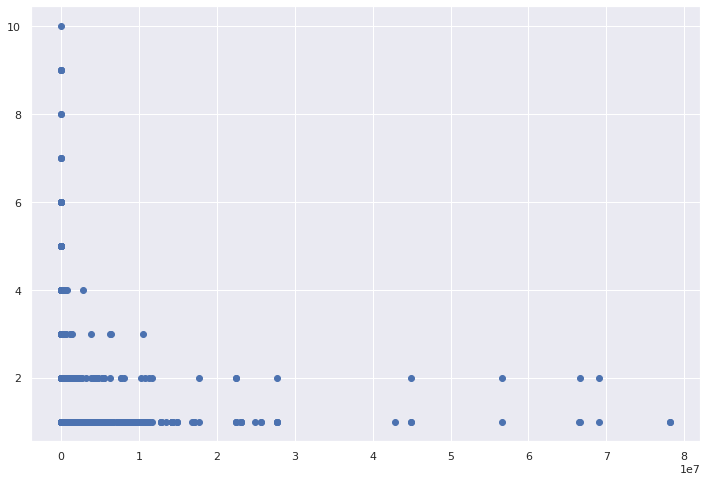

In [302]:
saparate(counts, 150, 1, 1)

<div dir=rtl><h4>
קיבלנו כי עבור מספרי ביקורות הגדולים מ - 150 יש בין 1 ל - 10 אפלקציות ועבור מספרי ביקורות הקטנים מ - 150 יש בין 1 ל - 83 אפלקציות.ולכן נראה כי מספר התגובות יורד בצורה חדה מאד החל מ150 ולרוב האפלקציות יש מספר נמוך של תגובות.
</br>
בנוסף, ניתן לראות כי התפלגות מספרי הביקורות עבור ביקורות הקטנות מ - 150 דומה להתפלגות אקספונניציאלית. 
</h4>
</div>

**Installs:**

<div dir=rtl><h4>
הנתונים על מספר ההורדות מוצגים כנתונים בדידים, למשל עבור אפליקציה עם 1322 הורדות, מספר ההורדות שלה, הרשום בסט הנתונים, יהיה 1000. 
כלומר, הנתונים שמורים ככפולות של עשר מ - 1 עד 9^10.
מסיבה זו, יהיה לנו קל יותר להציג ערכים סטטיסטים על לוג הנתונים. 

</h4>
</div>

The mean of the installs is:  5.282104700854701
The median of the installs is:  2.776747065960808
Histogram: 


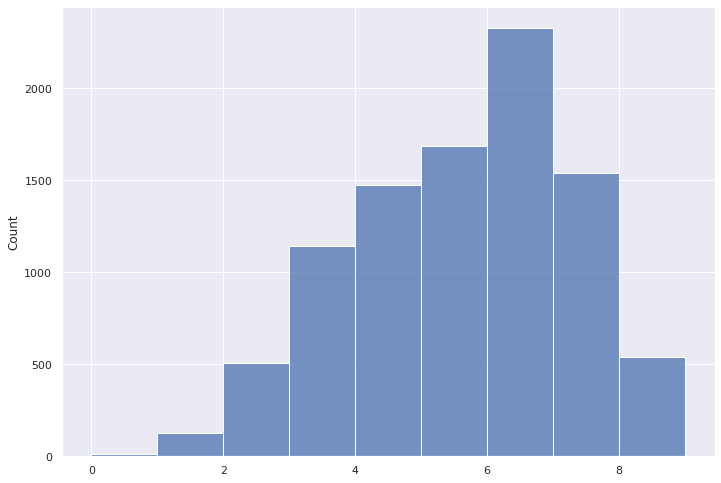

In [303]:
vals = df['Installs'].to_numpy()
vals = [ round(math.log(v, 10)*2)/2 for v in vals]

print('The mean of the installs is: ', np.mean(vals))
print('The median of the installs is: ', np.var(vals))
print('Histogram: ')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(vals, binwidth=1)
plt.show()


<div dir=rtl><h4>
ממוצא לוג מספר ההורדות הוא 
<b>
5.28
</b>
ושונות לוג מספר ההורדות 
היא
<b>
2.77
</b>
.
</br>
ההיסטוגרמה של לוג ההורדות מזכירה התפלגות נורמלית.
</h4>
</div>

**IsFree:**
<div dir=rtl><h3>
נבנה גרף פאי על מנת להמחיש את ההתפגלות של האפלקציות החינמיות
</h3>
</div>


In [304]:
def stats_catgorial(df,col):
  if col=='IsFree' or col=='Recntly Updated':
    sns.set(rc={'figure.figsize':(10,10)})
    sizes = [len(df[df[col]==True]),len(df[df[col]==False])]
    labels = ['True','False']
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.2f%%',startangle = 60)
    ax.axis('equal')
    ax.set_title(col)
    plt.show()
  else:
    sns.catplot(x=col, kind = "count", data=df,aspect=2.5)
    plt.xticks(rotation=90)
    plt.show()

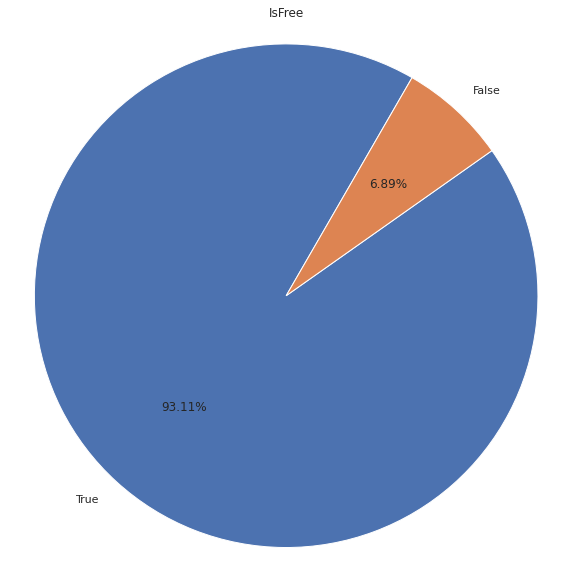

In [305]:
stats_catgorial(df,'IsFree')

**Recently Updated:**
<div dir=rtl><h3>
בצורה דומה נבנה גרף פאי על מנת להמחיש את ההתפלגות של האפלקציות שעודכנו לאחרונה(חצי שנה אחרונה) 
</h3>
</div>

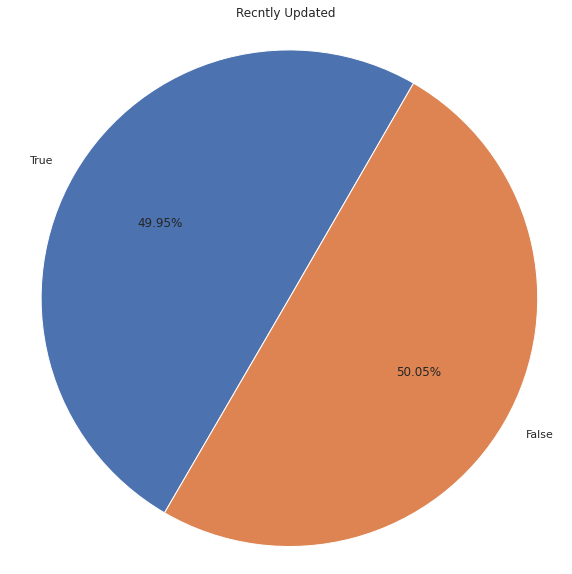

In [306]:
stats_catgorial(df,'Recntly Updated')

**Category:**
<div dir=rtl><h3>
נבנה גרף עמודות על מנת לתאר את ההתפלגות של האפלקציות על גבי הקטגוריות השונות.
</h3>
</div>



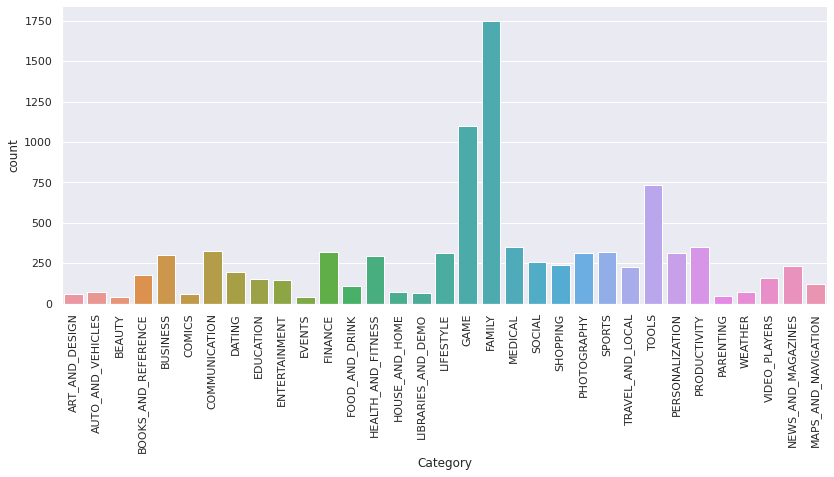

In [307]:
stats_catgorial(df,"Category")

**Genres:**
<div dir=rtl><h3>
נבנה גרף עמודות על מנת לתאר את התדירות שבה מופיע כל גז'נאר ברשימת הגז'אנרים של האפלקציות השונות  .
</h3>
</div>


In [308]:
def get_pos(list,val):
  i = 0
  for l in list:
    if l == val:
      return i
    else: 
      i += 1
  return -1

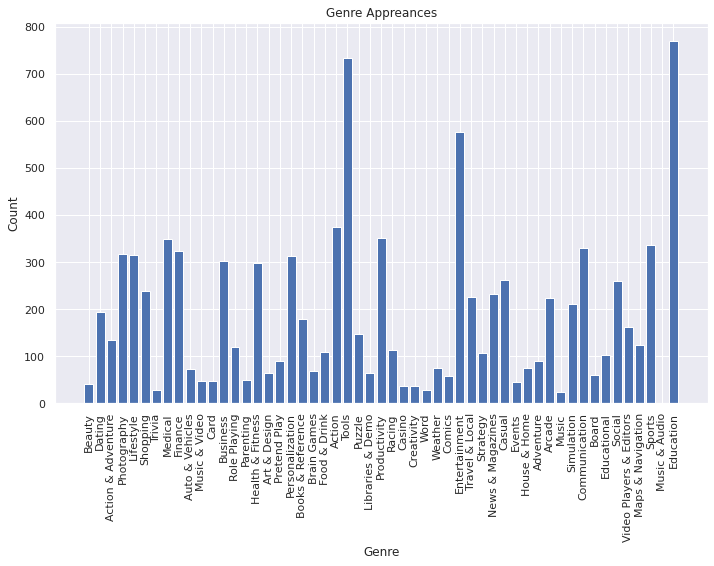

In [309]:
differnt_values = set()
genres_corr = []
geners_lists = df['Genres'].map(lambda g: g.split(';'))

for genres in geners_lists:
  for gen in genres: 
    differnt_values.add(gen)
for gen in differnt_values:
  genres_corr.append((gen,(np.zeros(len(differnt_values)))))
dict_corr = dict(genres_corr)
for genres in geners_lists:
  for g1 in genres:
    for g2 in genres:
      dict_corr[g1][get_pos(list(dict_corr.keys()),g2)] += 1
genre_dict = {}
for genre in dict_corr.keys():
  genre_dict[genre] = dict_corr[genre][get_pos(list(dict_corr.keys()),genre)]
plt.figure(figsize=(11.7,7))
plt.xticks(rotation=90)
plt.title('Genre Appreances')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.bar(genre_dict.keys(),genre_dict.values())
genre_corr = pd.DataFrame.from_dict(dict_corr,orient='index',columns= dict_corr.keys()).corr()

<div dir=rtl><h3>
נבנה מפת חום על מנת לבדוק את הקורולציה בין הגז'נרים השונים,כלומר את הסבירות שבה שני גז'נרים יופיעו ביחד עבור אפלקציה כלשהי
</h3>
</div>

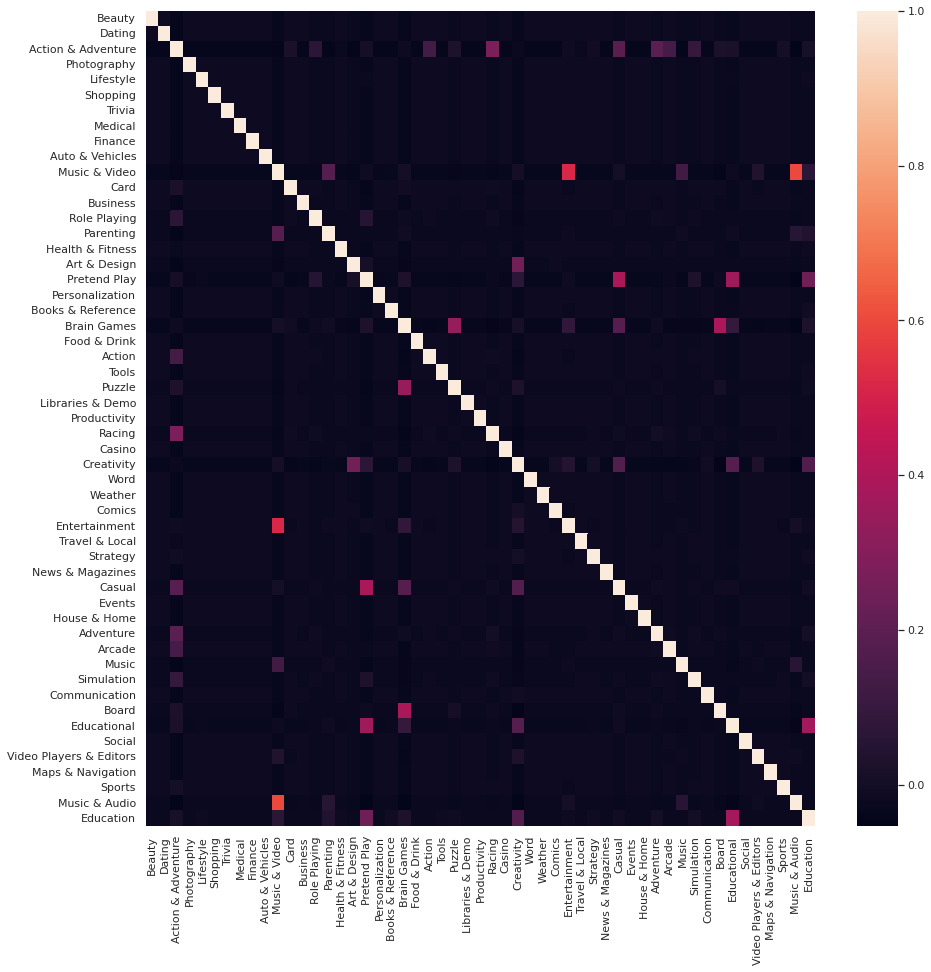

In [310]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(genre_corr)

<div dir=rtl>

<h3><b>
שאלות המחקר:
</b>
</h3>
<h4> 

1. נבדוק האם פופלריות של אפלקציה קשורה לדירוג של האפלקציה.(המשתנה המסביר כמות ההרודות והמוסבר דירוג האפלקציה)
</br>
2. נבדוק האם כמות התגובות קשורה להאם האפלקציה עודכנה לאחרונה.(המשתנה המסביר כמות התגובות והמוסבר האם האפלקציה עודכנה לאחרונה)
</br>
2. נבדוק האם כמות ההורודות משתנה בהתאם להאם האפלקציה חינמית או לא. 
</br>


</h4>




</div>